# Microsoft Professional Program for Data Science 

#### This notebook shall help preparing the data for the regression training by estimating all missing columns of incomplete data entries.

In [1]:
# Import standard library set and shared definitions of file names and paths
%run -i MPPSharedDefines.py
%matplotlib inline

import seaborn as sns
import scipy.stats as ss
import sklearn.decomposition as skde
from sklearn import feature_selection as fs

In [2]:
training_data_pd = pd.read_csv(TEMP_PATH+CLEANED_TRAINING_OUTPUT_FN)
training_data_pd.head(10)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread,sex_name,ethnicity_name,race_name,loan_type_name,property_type_name,purpose_name,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,msa_spread,lender_spread,county_spread,state_spread,income_loan_rel
0,0,2,1,1,1,139.0,1,261,14,246,2,5,1,77.0,5949.0,11.642,63.192,100.000,1556.0,1993.0,2094,True,1.0,Male (1),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1),63.192000,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,2.469724,1.293729,2.191489,2.189856,1.805195
1,1,2,2,1,1,160.0,3,349,48,311,1,5,1,42.0,2667.0,37.141,63.693,75.729,875.0,1163.0,4194,False,2.0,Male (1),Hispanic/Latino(1),White(5),FHA-insured(2),Manufactured housing(2),Home purchase(1),48.234072,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,0,2.115840,1.470833,2.539326,2.106717,3.809524
2,2,1,2,1,1,168.0,3,385,30,256,3,2,1,34.0,6393.0,79.635,42.883,76.948,636.0,1611.0,1119,False,3.0,Male (1),Unknown(3),Asian(2),Conventional(1),Manufactured housing(2),Home purchase(1),32.997611,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,0,1.440120,5.696156,1.440120,1.846466,4.941176
3,3,1,2,1,1,57.0,3,117,30,46,1,6,1,37.0,7175.0,72.843,63.806,78.836,1587.0,2172.0,1119,False,6.0,Male (1),Hispanic/Latino(1),Unknown,Conventional(1),Manufactured housing(2),Home purchase(1),50.302098,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,0,1.931591,5.696156,1.931591,1.846466,1.540541
4,4,2,1,2,1,25.0,3,95,41,192,2,5,2,46.0,5041.0,23.188,70.908,59.579,756.0,1992.0,1593,False,4.0,Female (2),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home improvement(2),42.246277,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,1.703774,3.400000,1.567861,1.711373,0.543478
5,5,2,1,1,1,88.0,2,261,50,92,2,5,2,53.0,3278.0,4.913,55.945,100.000,1141.0,2647.0,2800,True,1.0,Female (2),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1),55.945000,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,2.469724,1.145833,1.650000,2.035387,1.660377
6,6,2,1,1,1,345.0,3,80,9,232,1,5,1,90.0,3827.0,16.331,114.291,67.921,1113.0,1352.0,3797,True,1.0,Male (1),Hispanic/Latino(1),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1),77.627590,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,0,1.606164,1.062500,1.458333,1.659062,3.833333
7,7,2,1,1,1,123.0,3,189,3,207,1,5,1,38.0,5975.0,47.466,73.584,52.528,1033.0,1766.0,2428,False,1.0,Male (1),Hispanic/Latino(1),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1),38.652204,True,False,False,True,False,F

In [3]:
validation_data_pd = pd.read_csv(TEMP_PATH+CLEANED_TEST_OUTPUT_FN)
validation_data_pd.head(10)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,msa_spread,lender_spread,county_spread,state_spread,income_loan_rel
0,0,1,2,1,1,46.0,3,262,37,83,1,5,2,50.0,10761.0,43.415,61.732,100.000,2900.0,3603.0,1119,False,61.732000,False,True,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,0,1.687764,5.696156,1.642565,1.694429,0.920000
1,1,1,1,3,1,170.0,3,282,11,267,2,5,1,155.0,2285.0,20.115,50.373,100.000,539.0,873.0,4216,False,50.373000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,1.780000,2.571429,1.780000,1.794855,1.096774
2,2,1,1,1,1,174.0,3,274,12,162,1,5,1,102.0,7765.0,78.621,75.175,54.165,1559.0,1712.0,2467,False,40.718539,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,0,1.521739,1.891626,1.428058,1.653114,1.705882
3,3,1,1,1,2,116.0,2,254,37,282,2,5,1,51.0,3387.0,96.208,48.677,74.476,938.0,784.0,2773,True,36.252683,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,1.608380,2.262295,1.613712,1.694429,2.274510
4,4,1,1,3,1,108.0,3,194,41,17,2,5,1,88.0,3106.0,6.370,68.070,100.000,1119.0,1301.0,3110,False,68.070000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,1.527915,2.082849,1.471471,1.711373,1.227273
5,5,1,1,1,1,53.0,3,215,11,39,2,3,1,26.0,6338.0,89.621,68.957,88.605,1303.0,1837.0,356,False,61.099350,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,0,1.413651,1.254048,1.269481,1.794855,2.038462
6,6,1,1,3,1,175.0,3,294,31,101,2,5,1,55.0,4488.0,4.468,84.698,100.000,1290.0,1444.0,1657,False,84.698000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,1.973928,1.180952,2.412587,1.946414,3.181818
7,7,2,1,1,1,135.0,2,339,14,230,1,5,1,40.0,6896.0,22.123,65.203,81.272,1933.0,2772.0,809,False,52.991782,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,0,1.750000,1.046948,1.750000,2.189856,3.375000
8,8,2,1,1,1,290.0,3,29,30,174,1,5,1,72.0,4587.0,90.579,59.894,100.000,884.0,1173.0,4243,False,59.894000,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,0,1.703116,1.194030,1.685419,1.846466,4.027778
9,9,1,1,1,1,4.0,3,154,33,232,2,5,1,57.0,7436.0,52.746,65.855,88.008,1892.0,3039.0,3038,False,57.957668,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,1.549711,1.241071,1.602532,1.599779,0.070175


In [4]:
validation_data_pd.count()

row_id                            200000
loan_type                         200000
property_type                     200000
loan_purpose                      200000
occupancy                         200000
loan_amount                       200000
preapproval                       200000
msa_md                            200000
state_code                        200000
county_code                       200000
applicant_ethnicity               200000
applicant_race                    200000
applicant_sex                     200000
applicant_income                  200000
population                        200000
minority_population_pct           200000
ffiecmedian_family_income         200000
tract_to_msa_md_income_pct        200000
number_of_owner-occupied_units    200000
number_of_1_to_4_family_units     200000
lender                            200000
co_applicant                      200000
tract_income                      200000
sex_male                          200000
sex_female      

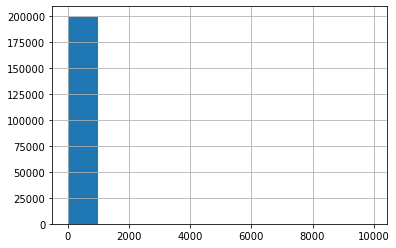

In [53]:
validation_data_pd['applicant_income'].hist()

In [5]:
# Receive training data target labels
training_rate_spread = np.array(training_data_pd['rate_spread'])

# Remove all other labels

In [6]:
def convert_categorical_columns(data_set):
    """
    Removes all columns which are not part of the test data
    """
    reduced_data_set = pd.concat([data_set[['loan_amount', 'applicant_income', 'population', 'minority_population_pct', 
                                            'ffiecmedian_family_income', 'tract_to_msa_md_income_pct', 
                                            'number_of_owner-occupied_units','number_of_1_to_4_family_units', 
                                            'co_applicant']], \
                                  data_set.loc[:,'tract_income':'income_loan_rel']], axis=1)
    return reduced_data_set

prepared_training_set = convert_categorical_columns(training_data_pd)
prepared_training_set.head(5)

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,co_applicant,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,msa_spread,lender_spread,county_spread,state_spread,income_loan_rel
0,139.0,77.0,5949.0,11.642,63.192,100.000,1556.0,1993.0,True,63.192000,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,2.469724,1.293729,2.191489,2.189856,1.805195
1,160.0,42.0,2667.0,37.141,63.693,75.729,875.0,1163.0,False,48.234072,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,0,2.115840,1.470833,2.539326,2.106717,3.809524
2,168.0,34.0,6393.0,79.635,42.883,76.948,636.0,1611.0,False,32.997611,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,0,1.440120,5.696156,1.440120,1.846466,4.941176
3,57.0,37.0,7175.0,72.843,63.806,78.836,1587.0,2172.0,False,50.302098,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,0,1.931591,5.696156,1.931591,1.846466,1.540541
4,25.0,46.0,5041.0,23.188,70.908,59.579,756.0,1992.0,False,42.246277,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,1.703774,3.400000,1.567861,1.711373,0.543478


In [7]:
prepared_training_set.count()

loan_amount                       199783
applicant_income                  199783
population                        199783
minority_population_pct           199783
ffiecmedian_family_income         199783
tract_to_msa_md_income_pct        199783
number_of_owner-occupied_units    199783
number_of_1_to_4_family_units     199783
co_applicant                      199783
tract_income                      199783
sex_male                          199783
sex_female                        199783
sex_other                         199783
purp_purchase                     199783
purp_improvement                  199783
purp_refinancing                  199783
type_1_to_4                       199783
type_manuf                        199783
type_multi_fam                    199783
oc_owner_occ                      199783
oc_not_owner_occ                  199783
oc_not_app                        199783
preapp_owner_occ                  199783
preapp_not_oo                     199783
preapp_not_app  

In [8]:
validation_set = convert_categorical_columns(validation_data_pd)
validation_set.head(5)

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,co_applicant,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,msa_spread,lender_spread,county_spread,state_spread,income_loan_rel
0,46.0,50.0,10761.0,43.415,61.732,100.000,2900.0,3603.0,False,61.732000,False,True,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,0,1.687764,5.696156,1.642565,1.694429,0.920000
1,170.0,155.0,2285.0,20.115,50.373,100.000,539.0,873.0,False,50.373000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,1.780000,2.571429,1.780000,1.794855,1.096774
2,174.0,102.0,7765.0,78.621,75.175,54.165,1559.0,1712.0,False,40.718539,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,0,1.521739,1.891626,1.428058,1.653114,1.705882
3,116.0,51.0,3387.0,96.208,48.677,74.476,938.0,784.0,True,36.252683,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,1.608380,2.262295,1.613712,1.694429,2.274510
4,108.0,88.0,3106.0,6.370,68.070,100.000,1119.0,1301.0,False,68.070000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,1.527915,2.082849,1.471471,1.711373,1.227273


In [9]:
print(prepared_training_set.shape)
print(validation_set.shape)

(199783, 45)
(200000, 45)


In [10]:
features = np.array(prepared_training_set)
test_features = np.array(validation_set)
labels = np.array(training_rate_spread).reshape(-1,1)

# Principal Component Analysis
# pca_model = skde.PCA()
# pca_fit = pca_model.fit(features)
# features = pca_fit.transform(features)
# Note: No improvement via PCA

# Feature Reduction
# sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
# features = sel.fit_transform(features)
# Note: No improvement via feature selection

scaler = preprocessing.StandardScaler().fit(features)
features = scaler.transform(features)
test_features = scaler.transform(test_features)

label_scaler = preprocessing.StandardScaler().fit(labels)
labels = label_scaler.transform(labels)

In [11]:
def hist_resids(y_test, y_score, model):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    fig = plt.figure(figsize=(16,6))
    sns.distplot(resids)
    plt.title('Histogram of residuals ({})'.format(model))
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score, model):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    fig = plt.figure(figsize=(16,6))
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values ({})'.format(model))
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
    
def resid_plot(y_test, y_score, model):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    fig = plt.figure(figsize=(16,6))
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values ({})'.format(model))
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')    
    
def show_pred_vs_test(y_test, y_score, model):
    samples = 60
    fig = plt.figure(figsize=(16,6))
    x = range(samples)
    y1 = y_test[:samples].reshape(-1)
    y2 = y_score[:samples].reshape(-1)
    dy = (y2-y1)/2
    ye = (y1+y2)/2
    plt.scatter(x, y1, c='red')
    plt.scatter(x, y2, c='blue')
    plt.errorbar(x, ye, yerr=dy, fmt='.');
    plt.ylabel("Rate spread")
    plt.xlabel("Test sample")
    plt.title("Predicted vs. test value ({})".format(model))
    plt.show()    
    
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))    

In [12]:
X_train, X_valid, y_train, y_valid = ms.train_test_split(features, labels, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = ms.train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("{} {} {} {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

## define and fit the linear regression model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_train, y_train.ravel())

y_score = lin_mod.predict(X_test)

print_metrics(y_test, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_test)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])

(161823, 45) (17981, 45) (161823, 1) (17981, 1)
Mean Square Error      = 0.2779232457153316
Root Mean Square Error = 0.5271842616347074
Mean Absolute Error    = 0.3457615931365464
Median Absolute Error  = 0.20784814929792805
R^2                    = 0.7220858053918526
Adjusted R^2           = 0.7214040355121271

Rescaled:
Mean Square Error      = 0.695461497714842
Root Mean Square Error = 0.8339433420292064
Mean Absolute Error    = 0.5469540718676319
Median Absolute Error  = 0.32879126497938715
R^2                    = 0.7220858053918526
Adjusted R^2           = 0.7214040355121271


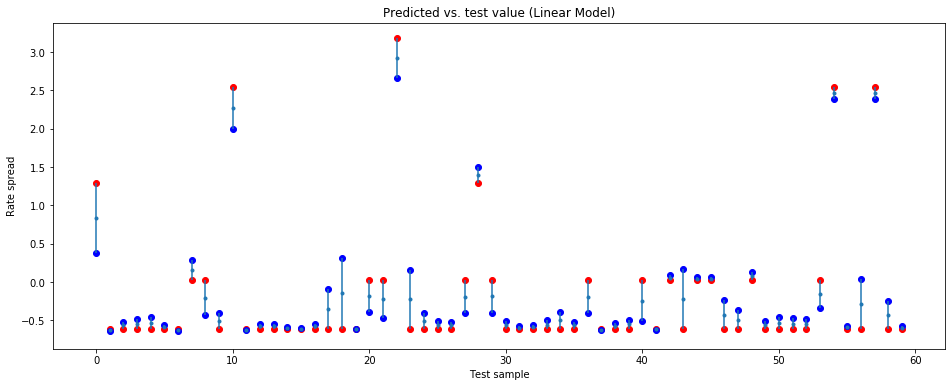

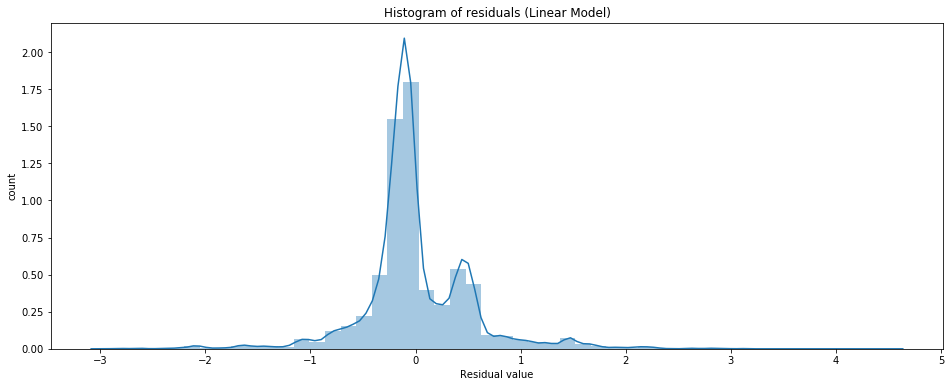

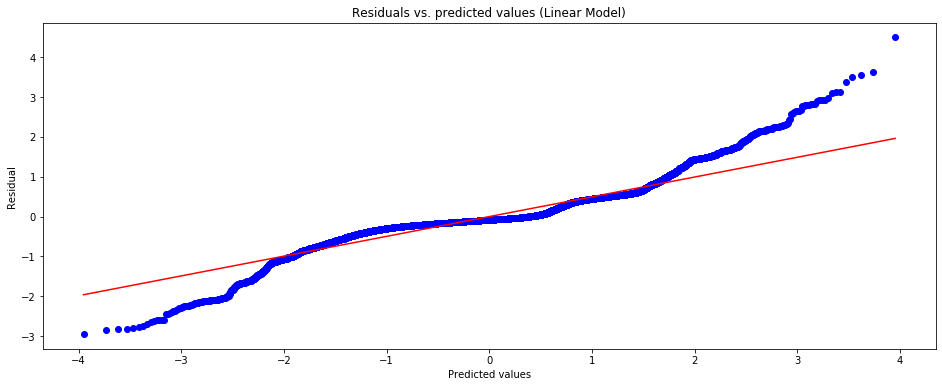

In [13]:
show_pred_vs_test(y_test, y_score, 'Linear Model')
hist_resids(y_test, y_score, 'Linear Model')
resid_qq(y_test, y_score, 'Linear Model')

In [15]:
from sklearn.neural_network import MLPRegressor
nn_mod = MLPRegressor(hidden_layer_sizes=100, max_iter=200)
nn_mod.fit(X_train, y_train.ravel())

y_score = nn_mod.predict(X_test)

print_metrics(y_test, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_test)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])

Mean Square Error      = 0.22301868381772716
Root Mean Square Error = 0.47224854030237845
Mean Absolute Error    = 0.3144797815217226
Median Absolute Error  = 0.18047195677042804
R^2                    = 0.7769885792163747
Adjusted R^2           = 0.7764414949994657

Rescaled:
Mean Square Error      = 0.5580710151360799
Root Mean Square Error = 0.7470415083086615
Mean Absolute Error    = 0.4974699343065028
Median Absolute Error  = 0.2854853563059645
R^2                    = 0.7769885792163748
Adjusted R^2           = 0.7764414949994658


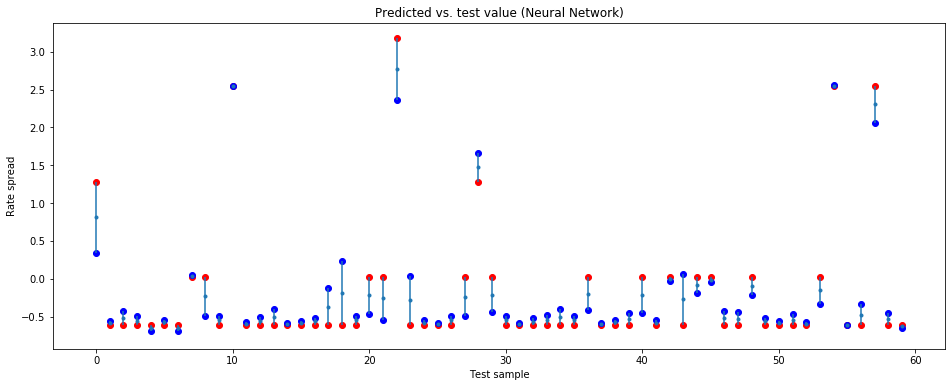

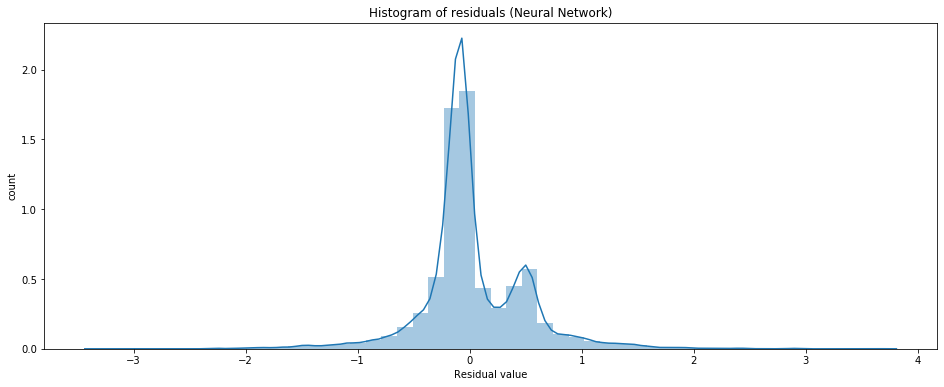

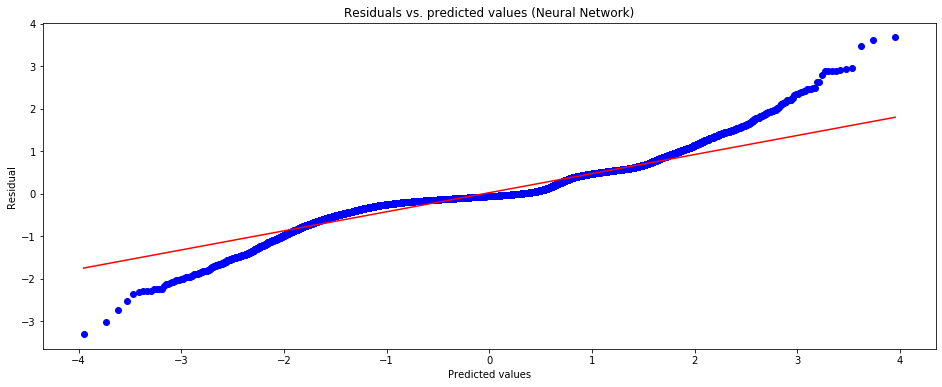

In [16]:
show_pred_vs_test(y_test, y_score, 'Neural Network')
hist_resids(y_test, y_score, 'Neural Network')
resid_qq(y_test, y_score, 'Neural Network')

In [18]:
y_score = nn_mod.predict(X_valid)

print_metrics(y_valid, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_valid)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])

Mean Square Error      = 0.21505055352505395
Root Mean Square Error = 0.463735434838717
Mean Absolute Error    = 0.3097535981947826
Median Absolute Error  = 0.1795960422024473
R^2                    = 0.7826524618806407
Adjusted R^2           = 0.7821727141291984

Rescaled:
Mean Square Error      = 0.5381319567350222
Root Mean Square Error = 0.7335747792386419
Mean Absolute Error    = 0.4899936695437998
Median Absolute Error  = 0.2840997627378088
R^2                    = 0.7826524618806407
Adjusted R^2           = 0.7821727141291984


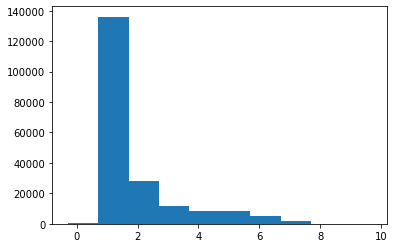

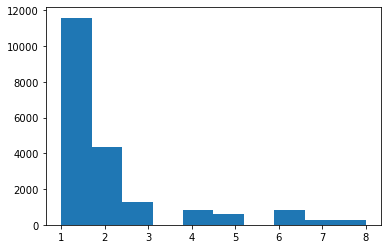

1.0
8.0
1.9564542769908404
1.573501020585616


In [36]:
plt.hist(rescaled_score)
plt.show()
plt.hist(rescaled_test)
plt.show()
print(rescaled_test.min())
print(rescaled_test.max())
print(rescaled_test.mean())
print(rescaled_test.std())


-0.3015019550830229
9.705397484289826
1.92610168339458
1.3752083421207137


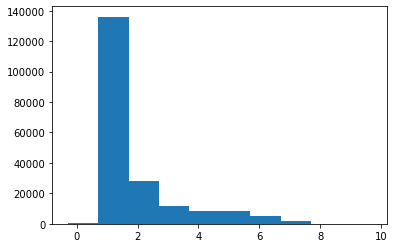

In [40]:
y_test_score = nn_mod.predict(test_features)
# print(y_test_score.shape)
rescaled_score = label_scaler.inverse_transform(y_test_score)
print(rescaled_score.min())
print(rescaled_score.max())
print(rescaled_score.mean())
print(rescaled_score.std())
plt.hist(rescaled_score)
plt.show()

In [47]:
submission = pd.DataFrame(columns=['row_id', 'rate_spread'])
submission['row_id'] = range(0, 200000)
submission['rate_spread'] = rescaled_score

print(submission.count())

below_1 = submission.loc[submission['rate_spread']<0.5]
print(below_1.count())

row_id         200000
rate_spread    200000
dtype: int64
row_id         35
rate_spread    35
dtype: int64


In [51]:
critical_rows = validation_data_pd.iloc[below_1.index]
critical_rows.head(20)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,msa_spread,lender_spread,county_spread,state_spread,income_loan_rel
13501,13501,2,1,3,1,62.0,3,74,40,274,1,4,1,21.000000,7320.0,94.945,60.335,60.249,1654.0,2012.0,2816,False,36.351234,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,0,2.039711,1.030609,1.959128,2.473496,2.952381
16835,16835,1,1,1,2,820.0,3,370,35,101,2,5,1,250.000000,3892.0,3.961,60.259,100.000,1647.0,3250.0,747,False,60.259000,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,2.682927,1.250000,2.682927,2.913540,3.280000
25680,25680,2,1,3,1,66.0,3,109,37,306,3,5,4,64.000000,10211.0,34.580,57.757,100.000,2569.0,3689.0,2862,False,57.757000,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,0,1.634625,1.265306,1.642783,1.694429,1.031250
25940,25940,1,1,1,1,281.0,1,175,39,169,2,5,1,73.620569,24121.0,6.807,75.641,100.000,4753.0,5313.0,1948,True,75.641000,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,1,1.882353,1.000000,1.797101,2.158898,3.816868
28655,28655,1,1,3,1,7069.0,3,254,37,282,2,5,1,8051.000000,2717.0,32.943,49.721,100.000,836.0,1159.0,572,False,49.721000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,1.608380,1.626263,1.613712,1.694429,0.878028
39816,39816,2,2,3,3,83.0,3,261,9,217,2,5,2,73.620569,4131.0,18.380,68.086,96.084,1284.0,1762.0,445,False,65.419752,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,1,2.469724,1.050000,1.294118,1.659062,1.127402
49840,49840,2,1,3,3,172.0,3,261,46,308,2,5,2,60.000000,6691.0,17.628,59.853,72.757,1550.0,2654.0,445,False,43.547247,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,2.469724,1.050000,1.341463,1.507739,2.866667
50102,50102,1,3,3,2,3700.0,3,8,35,181,4,7,4,73.620569,3695.0,97.358,62.413,55.374,1095.0,1709.0,747,False,34.560575,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1,2.643098,1.250000,1.794798,2.913540,50.257694
58347,58347,1,1,1,2,4621.0,3,261,50,240,2,5,1,1641.000000,2808.0,5.692,53.892,100.000,1129.0,2526.0,1260,True,53.892000,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,2.469724,1.450000,1.166667,2.035387,2.815966
62970,62970,1,1,3,1,54.0,3,197,35,119,2,5,2,30.000000,6673.0,8.074,56.664,88.749,1667.0,2570.0,3759,False,50.288733,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,F